In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("results/model_results.csv")

Como o número de épocas se relaciona com o learning_rate

- complexidade do modelo 
- learning rate
- época

+complexidade -> mais épocas, learning rate menor (supondo que não ha minimos locais)
              -> menor épocas, learning rate maior

# **Explorando** 

In [3]:
# a complexidade do modelo é definida pelo número de parâmetros
def model_complexity(x):
    lista = eval(x)
    lista.insert(0, 16)
    return sum(i*j for i, j in zip(lista, lista[1:]))

df = df.assign(complexity = df.hidden_layers.apply(model_complexity))
df.hidden_layers = df.hidden_layers.apply(eval)
df = df.assign(min_neuronio_layer = df.hidden_layers.apply(min),
               complexity_tier = pd.cut(df.complexity, 3).cat.codes.map({0:"baixo", 1:"médio", 2:"alto"}))


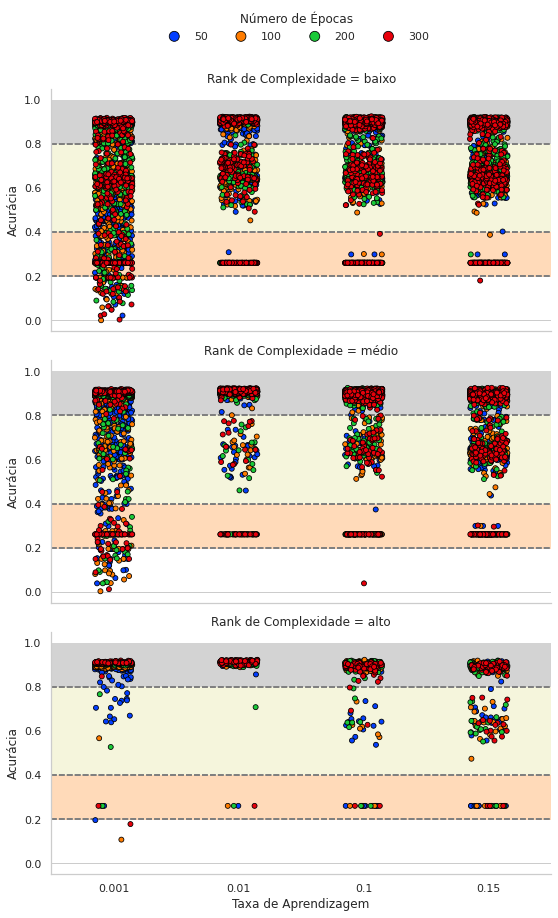

In [4]:
plot_df = df.rename(columns={"accuracy":"Acurácia", 
                             "complexity_tier": "Rank de Complexidade",
                             "learning_rate": "Taxa de Aprendizagem",
                             "num_epochs":"Número de épocas",
                             "min_neuronio_layer":"Menor Camada"})

g = sns.FacetGrid(plot_df, row="Rank de Complexidade", hue="Número de épocas", height=4, aspect=2,palette="bright")
g.map(sns.stripplot, 
      "Taxa de Aprendizagem", 
      "Acurácia", 
#      alpha=0.4,
      edgecolor="black",
      linewidth=0.8, 
      jitter=0.15,
      order=[0.001, 0.01, 0.1, 0.15])

g.map(plt.axhline, y=0.8, ls='--', c='gray')
g.map(plt.axhline, y=0.4, ls='--', c='gray')
g.map(plt.axhline, y=0.2, ls='--', c='gray')

g.map(plt.axhspan, ymin=.8, ymax=1, color='lightgray')
g.map(plt.axhspan, ymin=.4, ymax=.8, color='beige')
g.map(plt.axhspan, ymin=.2, ymax=.4, color='peachpuff')

g.add_legend()
sns.move_legend(g, "lower center", bbox_to_anchor=(.45, 1.01), ncol=4, title="Número de Épocas", frameon=False)

for lh in g._legend.legendHandles: 
    lh._sizes = [100]
    
plt.savefig("figures/analysis.eps", format="eps", bbox_inches='tight')

# **Análise Imagem**

In [5]:
metrics = [np.mean, np.std, min, max]
plot_df.groupby("Menor Camada").agg({"Acurácia":metrics})

Acurácia                              
                  mean       std       min       max
Menor Camada                                        
2             0.581783  0.256092  0.020933  0.918840
4             0.769938  0.213118  0.000000  0.922879
6             0.830354  0.160564  0.038193  0.924715
8             0.857468  0.125279  0.011752  0.925083
10            0.863742  0.115395  0.124862  0.925083
12            0.866876  0.109084  0.148733  0.924715
14            0.866402  0.117630  0.162321  0.922879
16            0.871515  0.112905  0.177745  0.923614
18            0.875951  0.124759  0.107235  0.921777
20            0.880669  0.081214  0.594198  0.923614

In [6]:
regiao3 = plot_df.query("0.2 < Acurácia & Acurácia < 0.4")
camadas3 = regiao3["Menor Camada"].value_counts().sort_index()
camadas3.name = "Região 3"

In [7]:
regiao2 = plot_df.query("0.4 < Acurácia & Acurácia < 0.8")
camadas2 = regiao2["Menor Camada"].value_counts().sort_index()
camadas2.name = "Região 2"

In [8]:
regiao1 = plot_df.query("Acurácia > 0.8")
regiao1["Menor Camada"].value_counts().sort_index()
camadas1 = regiao1["Menor Camada"].value_counts().sort_index()
camadas1.name = "Região 1"

In [9]:
camadas = pd.concat([camadas1, camadas2, camadas3], axis=1)

In [10]:
camadas.round(3)

,Região 1,Região 2,Região 3
2,1280,1811,1480.0
4,2512,840,363.0
6,2385,434,124.0
8,1967,234,46.0
10,1464,151,26.0
12,1016,102,14.0
14,647,56,15.0
16,366,26,6.0
18,168,2,5.0
20,44,4,NaN
